### Load FaceNet Model

[Model](https://github.com/nyoki-mtl/keras-facenet)

In [1]:
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras
import onnx

Convert model from *h5* to *saved-model* format to "face_net_nyoki" directory.

In [ ]:
from tensorflow.python.lib.io import file_io

model_file = file_io.FileIO('gs://shield-phishing/face_verification/pretrained_models/face_net_nyoki/facenet.h5', mode='rb')
with open("./temp_face_model.h5",'wb') as f:
    f.write(model_file.read())
    model_file.close()
    model = tf.keras.models.load_model(f.name)
    os.remove(f.name)

model.save('./face_net_nyoki/')
print(model.inputs)
print(model.outputs)

In [ ]:
model = keras.models.load_model('./inception_model/hiroki/facenet_keras.h5')

print(model.inputs)
print(model.outputs)

In [3]:
model = keras.models.load_model('./face_net_nyoki')

print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [2]:
import onnxruntime as rt

sess = rt.InferenceSession("../../onnx/facenet.onnx")

input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
print(input_name, label_name)

input_1 Bottleneck_BatchNorm


In [3]:
from mtcnn import MTCNN

detector = MTCNN()

In [4]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path)
    #plt.imshow(img)
    img = get_face(np.array(img), detector)
    img = gammaCorrection(np.array(img), gamma=0.5)
    img = tf.image.resize(img, [160, 160])
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    #print(embedding)
    return embedding / np.linalg.norm(embedding, ord=2)  # rescale the encoding vectors to have L2 norm equal to one

In [5]:
def verify(encoding_1, encoding_2):
    # Compute distance
    dist = np.linalg.norm(encoding_1 - encoding_2)

    if dist < 0.7:
        verified = True
    else:
        verified = False
    print("dist", dist)

    return verified

In [129]:
print(verify(img_to_encoding("./tutorial/images/camera_1.jpg", model), img_to_encoding("./tutorial/images/bertrand.jpg", model)))
print(verify(img_to_encoding("./tutorial/images/camera_3.jpg", model), img_to_encoding("./tutorial/images/bertrand.jpg", model)))
print(verify(img_to_encoding("./tutorial/images/camera_1.jpg", model), img_to_encoding("./tutorial/images/younes.jpg", model)))

dist 0.38364685
True
dist 0.29293463
True
dist 1.1670598
False


In [7]:
my_face_1 = [
    0.07694248110055923,
    0.6732915639877319,
    0.4158965051174164,
    -1.4763073921203613,
    0.3353734016418457,
    0.26575347781181335,
    0.2088325172662735,
    -0.4508192539215088,
    -1.112831473350525,
    -0.6273198127746582,
    1.258985996246338,
    -0.211908757686615,
    -0.7667157649993896,
    -0.7186007499694824,
    0.07980023324489594,
    0.6085467338562012,
    -0.45493510365486145,
    -1.0028132200241089,
    -0.18353530764579773,
    -0.9181604385375977,
    -0.5552465915679932,
    0.566446840763092,
    -0.9738317728042603,
    -0.02938126027584076,
    -0.25637996196746826,
    -0.5368854403495789,
    -0.20359750092029572,
    1.7466679811477661,
    -0.7551388740539551,
    1.0604450702667236,
    -0.466922789812088,
    0.5792308449745178,
    -0.296564519405365,
    -0.9894676804542542,
    0.3863237798213959,
    0.9283337593078613,
    -0.6011855006217957,
    0.33955734968185425,
    2.4371557235717773,
    0.526861310005188,
    -0.5153965353965759,
    -0.7562817931175232,
    -1.2965705394744873,
    0.1259453445672989,
    0.4270910918712616,
    -0.08592921495437622,
    -0.5522656440734863,
    -0.5188524723052979,
    -0.35505175590515137,
    0.3322279453277588,
    -0.6111497282981873,
    0.5956258177757263,
    0.5661174058914185,
    -0.531447172164917,
    -0.5788691639900208,
    1.772686243057251,
    -1.1425659656524658,
    -0.8795245885848999,
    -1.0560685396194458,
    0.17185452580451965,
    -0.7317959666252136,
    -0.6729159951210022,
    0.09327536821365356,
    -1.3626008033752441,
    -0.38450896739959717,
    0.5909135937690735,
    -0.26837611198425293,
    0.3219907879829407,
    0.21859991550445557,
    0.22832949459552765,
    0.11736635118722916,
    0.5668905973434448,
    -0.03544161096215248,
    -1.3071726560592651,
    0.2085334062576294,
    0.43109333515167236,
    -0.8846365213394165,
    0.8974361419677734,
    -0.5565587282180786,
    1.5254833698272705,
    0.5364166498184204,
    -0.8094819784164429,
    -0.5353508591651917,
    1.3601610660552979,
    1.384323000907898,
    0.2786451280117035,
    0.4086233079433441,
    -0.19735081493854523,
    0.05895841121673584,
    -0.30331531167030334,
    1.9625205993652344,
    -0.032670848071575165,
    0.07581217586994171,
    -0.23728543519973755,
    0.13642853498458862,
    1.1073323488235474,
    -0.4177526533603668,
    -1.3432353734970093,
    -1.1059753894805908,
    -0.520370364189148,
    -0.7409551739692688,
    0.49475979804992676,
    0.6804914474487305,
    -1.7120883464813232,
    -0.620806097984314,
    -1.209470272064209,
    0.5011812448501587,
    -0.6547195911407471,
    0.2528482973575592,
    0.6519810557365417,
    0.596581220626831,
    -0.3206111192703247,
    0.10284454375505447,
    0.09699765592813492,
    0.8972656726837158,
    0.7013847827911377,
    0.4856734573841095,
    2.199190139770508,
    -0.48060712218284607,
    0.42287477850914,
    -0.2546166777610779,
    0.6862845420837402,
    2.311567783355713,
    0.031679898500442505,
    0.10628251731395721,
    -0.7424847483634949,
    -1.0049861669540405,
    0.31195390224456787
]

my_face_2 = [
    0.12357403337955475,
    1.012105941772461,
    0.044044263660907745,
    -0.9890161752700806,
    0.30965209007263184,
    0.11240644007921219,
    0.036749813705682755,
    -0.2084299772977829,
    -0.9868743419647217,
    -0.6924331784248352,
    0.9419795870780945,
    -0.11687733232975006,
    -0.9626286625862122,
    -0.8356170654296875,
    -0.07018721103668213,
    0.829119861125946,
    -0.6473039388656616,
    -0.6881898045539856,
    -0.5710949301719666,
    -0.40619370341300964,
    -0.38165217638015747,
    1.0371853113174438,
    -1.2827332019805908,
    -0.17355817556381226,
    -0.6902690529823303,
    -0.6658127903938293,
    -0.46435868740081787,
    1.7929719686508179,
    -0.8552287220954895,
    0.910672128200531,
    -0.3628750145435333,
    0.4074957072734833,
    -0.0771419033408165,
    -0.9671555161476135,
    0.5742457509040833,
    1.028786301612854,
    -0.7229625582695007,
    -0.44760662317276,
    2.0113778114318848,
    0.6823660135269165,
    -0.8880649209022522,
    -0.4550357460975647,
    -1.2996923923492432,
    -0.2130664587020874,
    0.1678224802017212,
    -0.24043108522891998,
    -0.31044241786003113,
    0.07149489223957062,
    -1.0871013402938843,
    0.709739089012146,
    -0.5452414751052856,
    0.49191755056381226,
    0.7578945159912109,
    0.1028013601899147,
    -0.059395816177129745,
    1.437596321105957,
    -1.3316525220870972,
    -0.7383505702018738,
    -0.8204578161239624,
    -0.136938214302063,
    -0.6970272064208984,
    -0.80818772315979,
    0.29297712445259094,
    -0.9690948724746704,
    0.05686815828084946,
    0.6458823084831238,
    -0.2992137372493744,
    0.6922157406806946,
    -0.023115137591958046,
    -0.04733892157673836,
    0.061703160405159,
    0.1917724311351776,
    0.3085629343986511,
    -1.1470186710357666,
    0.08537580072879791,
    0.7471730709075928,
    -0.5507043600082397,
    1.1863301992416382,
    -0.07457055896520615,
    1.2915061712265015,
    0.36806946992874146,
    -1.0388890504837036,
    -0.7841486930847168,
    1.4695125818252563,
    1.5858368873596191,
    -0.1262262910604477,
    0.19236209988594055,
    -0.2579692602157593,
    0.514272928237915,
    -0.20532427728176117,
    1.809226155281067,
    0.22328856587409973,
    -0.1224944144487381,
    -0.24837198853492737,
    -0.21940642595291138,
    0.8442835211753845,
    -0.502853274345398,
    -1.5942442417144775,
    -0.9450085163116455,
    -0.4488261640071869,
    -0.6626699566841125,
    0.9943333268165588,
    0.3306596875190735,
    -1.4761425256729126,
    -0.44001269340515137,
    -1.5084279775619507,
    0.449296236038208,
    -0.45168182253837585,
    0.24517780542373657,
    0.6854455471038818,
    0.9560760855674744,
    -0.2452080398797989,
    0.19243094325065613,
    0.5097388625144958,
    0.6080493927001953,
    0.8398565053939819,
    0.3113359212875366,
    2.037128210067749,
    -0.28732046484947205,
    0.5267469882965088,
    -0.5641356706619263,
    0.613065242767334,
    1.8649907112121582,
    -0.2734779119491577,
    0.3641655445098877,
    -0.668705403804779,
    -0.7612277269363403,
    0.136443093419075
]
my_face_1 = np.asarray(my_face_1)
print("len", np.linalg.norm(my_face_1, ord=2))
my_face_2 = np.asarray(my_face_2)
my_face_1 = my_face_1 / np.linalg.norm(my_face_1, ord=2)
print("unit len", np.linalg.norm(my_face_1, ord=2))
my_face_2 = my_face_2 / np.linalg.norm(my_face_2, ord=2)
print(verify(my_face_1, my_face_2))

len 9.15599422039407
unit len 1.0
dist 0.34800583825135173
True


## Web Cam Tests

In [20]:
import io
import base64
import cv2
import imageio

In [7]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [8]:
def preprocess_and_decode(img_str):
    img_str = remove_prefix(img_str, 'data:image/png;base64,')
    #img = tf.io.decode_base64(img_str)
    img = base64.b64decode(img_str)
    img = tf.image.decode_png(img, channels=3)
    img = get_face(img.numpy(), detector)
    img = gammaCorrection(np.array(img), gamma=0.5)
    img = tf.image.resize(img, [160, 160])
    img = np.around(np.array(img) / 255.0, decimals=12)
    # if you need to squeeze your input range to [0,1] or [-1,1] do it here
    return img

In [9]:
def preprocess_from_base64(base64_img):
    base64_img = remove_prefix(base64_img, 'data:image/png;base64,')
    img = imageio.imread(io.BytesIO(base64.b64decode(base64_img)))
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR) # TODO: kolory mają znaczenie!
    img = get_face(img, detector)
    img = gammaCorrection(np.array(img), gamma=1.5)
    img = tf.image.resize(img, (160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)

    return img

In [10]:
def face_net_embeddings(face_photos):
    face_photos_preprocessed = []
    embeddings = []
    for base64_photo in face_photos:
        # face_photos_preprocessed.append(preprocess_and_decode(base64_photo))
        face_photos_preprocessed.append(preprocess_from_base64(base64_photo))

    response = sess.run([label_name], {input_name: np.array(face_photos_preprocessed, dtype=np.float32)})[0]
    # response = model.predict_on_batch(np.array(face_photos_preprocessed, dtype=np.float32))
    for emb in response:
        embeddings.append(emb / np.linalg.norm(emb, ord=2))
    return embeddings

In [22]:
# print(verify(img_to_encoding("/home/przemek/GAT/Zdjęcia-FV/test/photo-test2.png", model), img_to_encoding("/home/przemek/GAT/Zdjęcia-FV/test/photo2.png", model))) # OK

with open('/home/przemek/GAT/Zdjęcia-FV/test/photo1.txt', 'r') as file:
    base64_1 = file.read().rstrip()

with open('/home/przemek/GAT/Zdjęcia-FV/test/photo-test2.txt', 'r') as file:
    base64_2 = file.read().rstrip()

# Create embeddings
em = face_net_embeddings([base64_1, base64_2])
# print(em)
print(em[0], em[1])
print(verify(em[0], em[1]))

# Opcja ostatnia: zdekodować base64, zapisać plik i wrzucić w img_to_encoding?
# dist 0.68205935
# True
# dist 0.6579978
# True

[-0.04449112  0.00169326 -0.00228262  0.05374554  0.10345629 -0.08808532
 -0.03623652 -0.14326024 -0.12385057 -0.04692105  0.06355712 -0.1241649
  0.0514455  -0.00053316 -0.03883206  0.16171125  0.02076104 -0.07305897
 -0.07126284  0.04306244  0.04478144  0.10584361 -0.08724133  0.10120384
 -0.00968003  0.03827707 -0.00814262  0.16868171  0.10743615  0.12600906
  0.11553878  0.03403757  0.05088837  0.04175346 -0.08096063  0.11990324
 -0.07244166 -0.1108585   0.07625704  0.02689088  0.02638382 -0.0173239
  0.01493447 -0.03069946  0.0938141  -0.00175618 -0.05380702  0.04210215
 -0.07188234  0.08130059 -0.10835481 -0.03483521 -0.08654344  0.17873265
 -0.13749908  0.14371133 -0.00357182 -0.20730716 -0.04304126  0.096123
 -0.11378666  0.00281677  0.12741594  0.00963802 -0.19228913  0.03239032
  0.02867616 -0.08283979  0.01221352  0.07017191  0.02704988  0.03984777
  0.10707062  0.03950238  0.01160795 -0.02454483  0.05853354 -0.0185925
  0.06987502  0.10487262 -0.00209864 -0.05851007 -0.0295

### MTCNN

In [12]:
from mtcnn import MTCNN
from matplotlib import pyplot as plt


In [13]:
def face_detection(img, detector):
    return detector.detect_faces(img)

In [14]:
def bounding_box(res):
    x1, y1, width, height = res[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    return x1, y1, x2, y2

In [15]:
def get_face(img, detector):
    res = face_detection(img, detector)
    x1, y1, x2, y2 = bounding_box(res)

    return img[y1:y2, x1:x2]

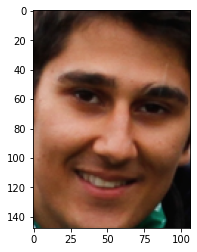

In [16]:
with open('/home/przemek/GAT/Zdjęcia-FV/triplet-base.txt', 'r') as file:
    img_str = file.read().rstrip()

img_str = remove_prefix(img_str, 'data:image/png;base64,')
img = base64.b64decode(img_str)
img = tf.image.decode_jpeg(img, channels=3)

detector = MTCNN()
plt.imshow(get_face(img.numpy(), detector))

## Gamma correction

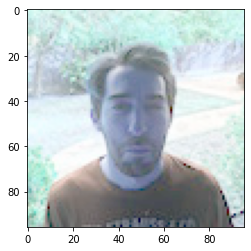

In [17]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pylab as plt

nat = io.imread('./tutorial/images/camera_1.jpg')
nat_2 = cv.cvtColor(nat, cv.COLOR_BGR2RGB)
plt.imshow(nat_2)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv.LUT(src, table)


gamma = 2.5      # change the value here to get different result
adjusted = gammaCorrection(nat_2, gamma=gamma)
plt.imshow(adjusted)

In [24]:
from PIL import ImageStat, Image
import math

def brightness_( base64_img ):
    im = Image.open(io.BytesIO(base64.b64decode(base64_img)))
    stat = ImageStat.Stat(im)
    return math.sqrt(0.241*(stat.mean[0]**2) + 0.691*(stat.mean[1]**2) + 0.068*(stat.mean[2]**2))

#### Ways to improve your facial recognition model

- Put more images of each person (under different lighting conditions, taken on different days, etc.) into the database. Then, given a new image, compare the new face to multiple pictures of the person. This would increase accuracy.
- Crop the images to contain just the face, and less of the "border" region around the face. This preprocessing removes some irrelevant pixels around the face, and also makes the algorithm more robust.